The GripQL API allows a user to download the schema of a graph. This outlines the different types of nodes, the edges the connect them and the structure of the documents stored in graph elements. A graph document has a `graph` field that has the name, a `vertices` field and an `edges` field.

```
{
 "graph": "rc5",
 "vertices": [
   {"gid": "Compound",
   "label": "Compound",
   "data": {"name": "STRING", "term": "STRING", "term_id": "STRING"}},
  ...],
  "edges": [
    {"gid": "(Project)--program->(Program)",
     "label": "program",
     "from": "Project",
     "to": "Program",
     "data": {}}
   ...]
}
```

Connect to BMEG server

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gripql
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
conn = gripql.Connection("https://bmeg.io/api", credential_file="bmeg_credentials.json")

Print avalible graphs

In [3]:
print(conn.listGraphs())

['bmeg_rc1_3', 'bmeg_rc1_3__schema__', 'bmeg_rc2', 'bmeg_rc3', 'bmeg_rc2__schema__', 'rc4', 'bmeg_rc3__schema__', 'rc4__schema__', 'rc5', 'rc5__schema__']


Get the schema graph

In [6]:
schema = conn.getSchema("rc5")

Start build graph using [NetworkX](https://networkx.github.io/)

In [7]:
g = nx.MultiDiGraph()

In [8]:
for v in schema['vertices']:
    g.add_node(v['gid'])
for e in schema['edges']:
    g.add_edge(e['from'], e['to'])

Draw Schema Graph

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


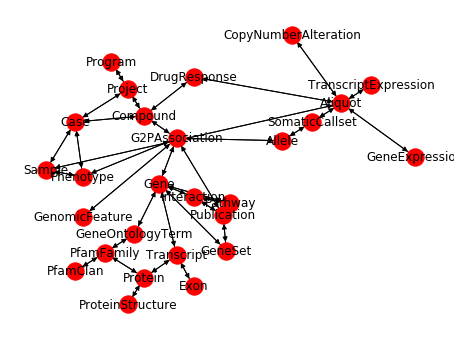

In [10]:
pos = graphviz_layout(g, prog='twopi', args='')
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw(g, pos, ax=ax, with_labels=True)